# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Para poder tener una descripción de los datos, primero se deben convertir a DataFrame los archivos .csv.

Después se llama al método ```info()``` en cada DataFrame para tener una visión global de los datos que tiene cada tabla 

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')

In [3]:
# mostrar información de instacart_orders_df
instacart_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información de products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información de other_products_df
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información de aisles_df
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información de departments_df
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

* En el DataFrame ```instacart_orders_df``` hay 28819 datos ausentes en la columna ```'days_since_prior_order'```, esto nos dice que probablemente hay clientes que realizaron su pedido anterior hace mucho tiempo o que no han realizado una compra antes y no hay registro. Además podemos observar que esta misma columna tiene un tipo de datos de ```float64```, se pueden decir 2 colclusiones a esto: 1. Es un posible error y se tiene cambiar el tipo de datos o 2. Esta columna contempla fracciones de días para el conteo.
* En el DataFrame ```products_df``` hay 1258 datos ausentes en la columna ```'product_name'```, probablemente hay un nombre de producto que aún no está registrado.
* En el DataFrame ```other_products_df``` hay tantos registros que pandas no realiza el conteo de valores no nulos, por lo que se tiene que usar otro método para saber si hay valores ausentes en el DataFrame. Además se puede observar que  la columna ```'add_to_cart_order'``` tiene un tipo de datos ```float64```, y esta columna al ser una orden secuencial es mejor tratarlo como entero.
* Tanto ```aisles_df``` como ```departments_df``` son DataFrames con pocos datos y ambos tienen sólo 2 columnas, la primer columna tiene valores de id y y la segunda tiene una descripción y los tipos de datos que se manejan son correctos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Para poder analizar los datos se realizará:

* Lo primero es encontrar los valores duplicados, si hay filas completas de datos repetidos deben ser tratadas, así como si hay valores categoricos que mezclen mayúsculas y minúsculas.

* Despues se necesita hacer un tratado a los valores ausentes que existan para no trabajar con ellos.

* Posteriormente se realiza el análisis

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados (instacart_orders_df)
display(instacart_orders_df[instacart_orders_df.duplicated()])
print()
print(instacart_orders_df.duplicated().sum())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN



15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay 15 renglones repetidos, se puede ver que los pedidos repetidos se hicieron en miércoles a la misma hora

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
display(instacart_orders_df[(instacart_orders_df['order_dow'] == 3) & (instacart_orders_df['order_hour_of_day'] == 2)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Esto muestra que los renglones son completamente iguales, todos los valores de las columnas son iguales y se pueden eliminar

In [10]:
# Elimina los pedidos duplicados
instacart_orders_df.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders_df.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_orders_df['order_id'].value_counts())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64


Se encontraron 15 datos repetidos, todos se encontraron en el mismo día y en la misma hora. Todos estos valores repetidos fueron eliminados y posterior se comprueba dos veces, usando métodos diferentes, que si fueron eliminados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products_df.duplicated().sum())

0


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
print(products_df['product_id'].duplicated().sum())

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df['product_name'] = products_df['product_name'].str.upper()

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products_df['product_name'].value_counts(dropna=False))

NaN                                                                              1258
GREEN TEA WITH GINSENG AND HONEY                                                    3
CARROT AND CELERY STICKS                                                            2
NUTRITION PROTEIN MIX BLUEBERRY NUT                                                 2
BAG OF ORGANIC LEMONS                                                               2
                                                                                 ... 
6\" FREE RANGER BULLY STIX                                                          1
SEASONED & COOKED PULLED WHITE MEAT CHICKEN WITH JACK DANIEL'S BARBEQUE SAUCE       1
ORGANIC TOMATO PUREE                                                                1
ORGANIC SUNCHOKE                                                                    1
CHOCOLATE CHIP ORGANIC                                                              1
Name: product_name, Length: 48333, dtype: int64


Se puede observar que no hay renglones que se repitan completamente y no hay id's de productos que se repitan, sin embargo se puede observar que hay datos no nulos que se repiten en la columna ```'product_name'```, posiblemente algunos nombres se usan más de una vez dentro de la tabla

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments_df.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments_df['department_id'].duplicated().sum())

0


No hay datos duplicados

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles_df.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles_df['aisle_id'].duplicated().sum())

0


No hay datos duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products_df.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products_df['order_id'].value_counts())

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64


Se observa que no hay renglones completamente repetidos, pero al verificar sólo la columna ```'order_id'``` se observa que hay datos repetidos, se decide no borrar estos datos ya que la cantidad es demasiada alta y lo más probable es que se repitan porque en la tabla se necesiten para identificar otras columnas

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
display(products_df[products_df['product_name'].isna()])

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Se puede observar que los 1258 valores ausentes se encuentran dentro del pasillo 100 en el departamento 21. A continuación se realizará el filtro junto con el pasillo 100

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
display(products_df[(products_df['product_name'].isna()) & (products_df['aisle_id'] == 100)])

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Se observa que siguen siendo los mismos 1258 valores ausentes, por lo que se puede asegurar que todos los productos con valores ausentes se encuentran en el pasillo 100. Se realizará un filtro más con el departamento 21 para ver si el comportamiento continua.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
display(products_df[(products_df['product_name'].isna()) & (products_df['aisle_id'] == 100) & (products_df['department_id'] == 21)])

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Siguen siendo los mismos 1258 productos que en el anterior, con esto podemos asegurar que los productos con valores ausentes en la columna ```'product_name'``` se encuentran en el pasillo 100, departamento 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(aisles_df[aisles_df['aisle_id']==100])
print()
display(departments_df[departments_df['department_id']==21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


Se realiza una busqueda del pasillo con id 100 y del departamento con id 21, en sus respectivas tablas y se puede observar que tienen un valor de "missing", por lo que no se sabe el nombre. Con esto se considera cambiar los valores ausentes, del DataFrame de products, a "Unknown".

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name'] = products_df['product_name'].where(~products_df['product_name'].isna(), 'Unknown')
print(products_df['product_name'].isna().sum())

0


Se observó que los valores ausentes de la columna ```'product_name'``` del DataFrame ```products_df``` se encontraban dentro del pasillo 100, departamento 21. Al analizar estos id's en sus respectivas tablas pude ver que tienen un valor de missing, por lo que es muy probable que los productos si existan y se tomó la desición de vambiar ese valor ausente por "Unknown" en lugar de eliminarlos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
display(instacart_orders_df[instacart_orders_df['days_since_prior_order'].isna()])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
display(instacart_orders_df[(instacart_orders_df['days_since_prior_order'].isna()) & (instacart_orders_df['order_number']==1)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


Se descubrió que los valores ausentes de la columna ```'days_since_prior_order'``` se deben a qeu es la primer compra de los clientes, por lo que he decidido cambiar estos valores. Cambiaré a -1 los valores de todos los ausentes porque no existen días negativos en esa columna, esto con el fin de no trabajar con valores ausentes.

In [30]:
instacart_orders_df['days_since_prior_order'] = instacart_orders_df['days_since_prior_order'].where(
    ~instacart_orders_df['days_since_prior_order'].isna(), -1)
print(instacart_orders_df['days_since_prior_order'].isna().sum())

0


### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(order_products_df.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products_df['add_to_cart_order'].max())
print(order_products_df['add_to_cart_order'].min())

64.0
1.0


El valor máximo que hay es de 64 y el mínimo es de 1 por lo que, es probable que haya valores ausentes porque se salen de este rango.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_con_na = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id']
display(id_con_na)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
#Creación de un DataFrame en los que los id de pedido tienen valores ausentes
orders_with_na_values = order_products_df.query("order_id in @id_con_na")

# Con ese DataFrame agrupe todos los pedidos con datos ausentes por su ID de pedido.
# Y cuenta el número de 'product_id' en cada pedido.
print(orders_with_na_values.groupby('order_id')['product_id'].count().sort_values())

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64


Los valores ausentes corresponden a pedidos que tienen más de 64 artículos, cambiaré ese valor por 999, para representar que son pedidos con más de 64 artículos, esto con el fin de no trabajar con valores ausentes. Además convertiré la columna completa a un tipo de datos entero.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999.
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].where(
    ~order_products_df['add_to_cart_order'].isna(), 999)
print(order_products_df.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [36]:
# Convierte la columna al tipo entero.
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int')
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


## Conclusiones

Las tablas tenían filas duplicadas las cuáles se eliminaron no contemplar esos datos duplicados. Y nuestras hipótesis, que fueron creadas a lo largo del estudio, fueron correctas.

Y de igual pudimos tratar los valores ausentes.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean razonables

In [37]:
# Verificar la columna 'order_hour_of_day'
print(instacart_orders_df['order_hour_of_day'].min())
print(instacart_orders_df['order_hour_of_day'].max())

0
23


In [38]:
# Verificar la columna 'order_dow'
print(instacart_orders_df['order_dow'].min())
print(instacart_orders_df['order_dow'].max())

0
6


Nuestras columnas ```'order_hour_of_day'``` y ```'order_dow'``` tienen valores razonables, es decir, dentro del rango que deberían tener esos valores.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

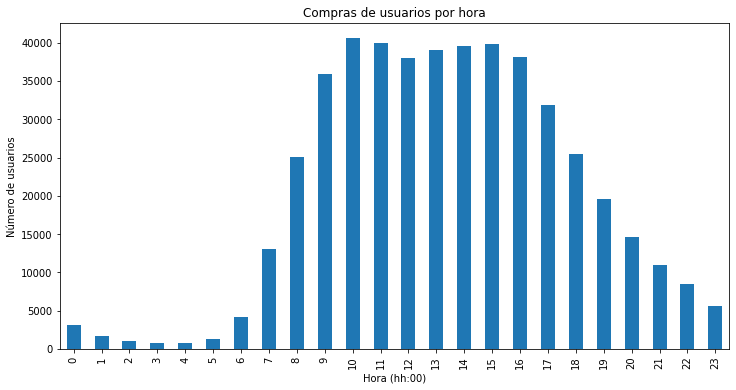

In [39]:
# Para graficar la cantidad de usuarios que compran (hacen ordenes), primero agrupe por las horas del día y conté cuántos
# usurarios hacen una orden en cada hora del día
user_orders_by_hour = instacart_orders_df.groupby('order_hour_of_day')['user_id'].count()

# Hace la gráfica
user_orders_by_hour.plot(title='Compras de usuarios por hora', xlabel='Hora (hh:00)', ylabel='Número de usuarios',
                         ylim=0, kind='bar', figsize=[12,6])
plt.show()

A partir de las 07:00 comienza a subir el número de personas que hacen pedidos, creciendo rápidamente hasta tener su pico más alto que es a las 10:00. Y es hasta a partir de las 16:00 que comienza a bajar gradualmente la cantidad de personas que hacen pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

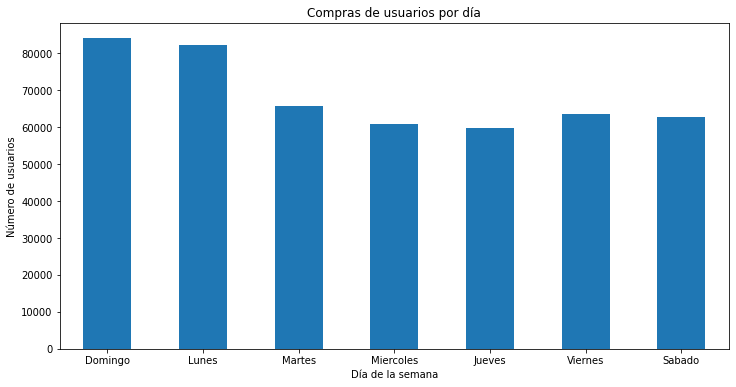

In [40]:
# Para graficar la cantidad de usuarios que compran (hacen ordenes) a la semana, primero agrupe por los días de la semana y
# conté cuántos usurarios hacen una orden en cada hora del día
user_orders_by_day = instacart_orders_df.groupby('order_dow')['user_id'].count()

# Se establece una lista con la leyenda que tendrá el eje x de la gráfica
days = ['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado']

# Hace la gráfica
user_orders_by_day.plot(title='Compras de usuarios por día', xlabel='Día de la semana', ylabel='Número de usuarios',
                         ylim=0, kind='bar', figsize=[12,6], rot=0)

# Cambia los 
plt.xticks(user_orders_by_day.index, days)
plt.show()

Los días domingo y lunes son los días que más usuarios hacen sus compras, siendo el domingo el día que tiene más usuarios.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

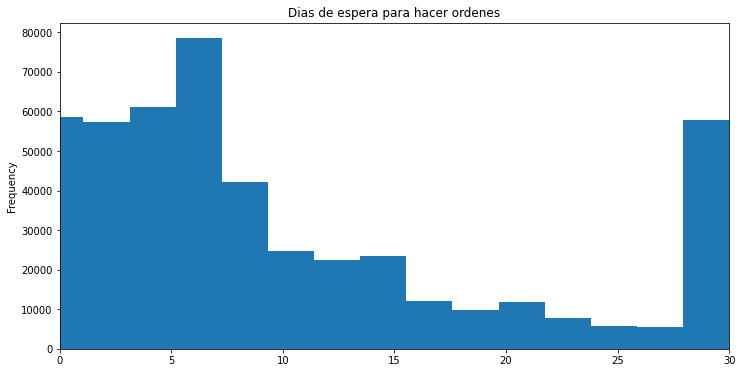

30.0


In [41]:
instacart_orders_df['days_since_prior_order'].plot(kind='hist', xlim=(0,30), figsize=[12,6], bins=15,
                                                 title='Dias de espera para hacer ordenes',
                                                   xlabel='Days')

plt.show()
print(instacart_orders_df['days_since_prior_order'].max())

Hay una gran acumulación de pedidos los primeros 6-7 días, después la cantidad de pedidos disminuye. Sin embargo vuelve a subir a los 30 días que se hace el pedido. Esto quiere decir que las personas hacen pedidos a los pocos días que ya hicieron un pedido o cuando pasa casi un mes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

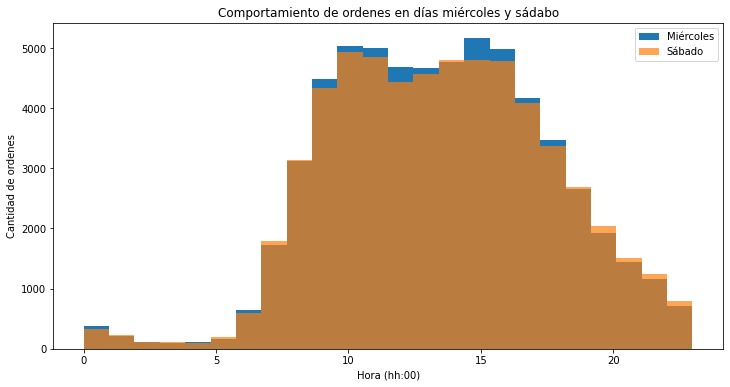

In [42]:
#Trazar la gráfica para los dos días
instacart_orders_df[instacart_orders_df['order_dow']==3]['order_hour_of_day'].plot(kind='hist', bins=24,
                                title='Comportamiento de ordenes en días miércoles y sádabo', figsize=[12,6])

instacart_orders_df[instacart_orders_df['order_dow']==4]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.7)
plt.xlabel('Hora (hh:00)')
plt.ylabel('Cantidad de ordenes')
plt.legend(['Miércoles','Sábado'])
plt.show()

El comportamiento de los días miércoles y sábado es muy similar, ambos muestran un incremento de ordenes de 8 de la mañana a 10 de la mañana. De las 10:00 hasta las 17:00 se mantienen estables las ordenes y despues de las 17:00 comienzan a bajar gradualmente las ordenes. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<function matplotlib.pyplot.show(close=None, block=None)>

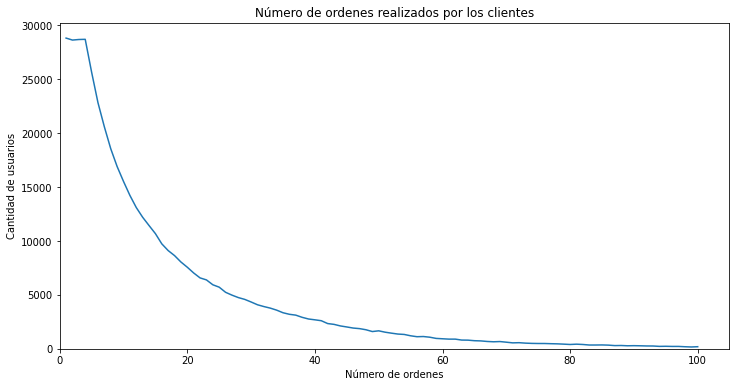

In [43]:
# Agrupe por order_number y después conté los user_id para saber cuantos numeros de ordenes ha hecho cada cliente que tiene su
# propio user_id
users_order_number = instacart_orders_df.groupby('order_number')['user_id'].count()

users_order_number.plot(title='Número de ordenes realizados por los clientes', xlabel='Número de ordenes',
                        ylabel='Cantidad de usuarios', figsize=[12,6], xlim=0, ylim=0)

plt.show

Alrededor de 28000 usuarios han ordenado de 1 a 4 veces, sin embargo despues comienza a descender la cantidad de usuarios que hacen más número de pedidos. Menos de 10000 usuarios han hecho más de 20 ordenes y menos de 5000 usuarios han hecho más de 40 ordenes. La gráfica muestra que aproximadamente cien usuarios han hecho 100 ordenes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
# Primero combino las tablas de instacart_orders_df y order_products_df para poder saber el id de los productos
first_merge = instacart_orders_df.merge(order_products_df, on='order_id', how='inner')

# Después combino esa tabla resultante con products_df para poder obtener el nombre de los productos
second_merge = first_merge.merge(products_df, on='product_id', how='inner')

# Hago uso de pivot_tables en esa tabla resultante (second_merge) para poder obtener un DataFrame con el product_id,
# product_name y que cuente cuantas veces aparece ese nombre en la tabla. 
products_names_20 = pd.pivot_table(second_merge, index=['product_id','product_name'], values='order_id', aggfunc='count')

# Ordena los valores en forma descendente y guarda solo los primeros 20
products_names_20 = products_names_20.sort_values(by='order_id', ascending=False).head(20)

products_names_20.columns=['quantity']

display(products_names_20)

,,quantity
product_id,product_name,
24852,BANANA,66050
13176,BAG OF ORGANIC BANANAS,53297
21137,ORGANIC STRAWBERRIES,37039
21903,ORGANIC BABY SPINACH,33971
47209,ORGANIC HASS AVOCADO,29773
47766,ORGANIC AVOCADO,24689
47626,LARGE LEMON,21495
16797,STRAWBERRIES,20018
26209,LIMES,19690


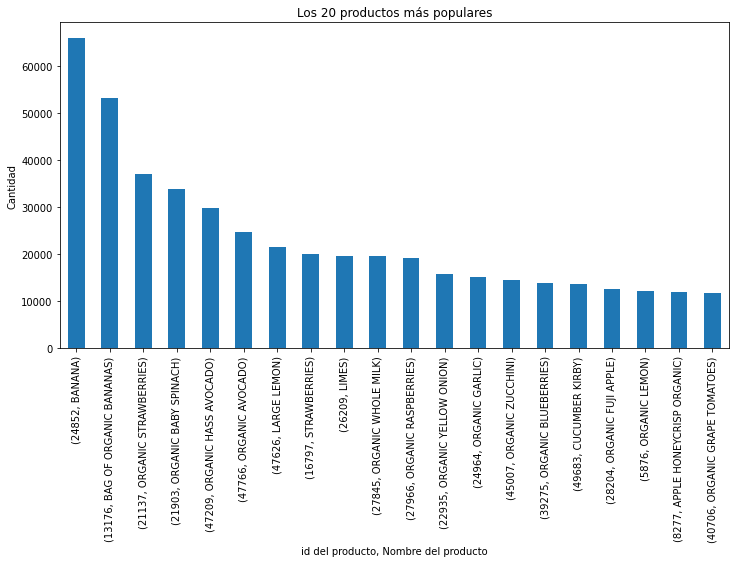

In [45]:
products_names_20.plot(kind='bar', figsize=(12,6), title='Los 20 productos más populares', xlabel='id del producto, Nombre del producto',
                      ylabel='Cantidad', legend=False)

plt.show()

Con base en la tabla y la gráfica, ```'BANANA'``` es el producto que más ordenan los usuarios y en el puesto 20 está ```'ORGANIC GRAPE TOMATOES'```. Además se puede observar que la mayoría de esos productos son frutas y vegetales. con lo que se puede decir que los usuarios prefieren ordenar este tipo de productos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

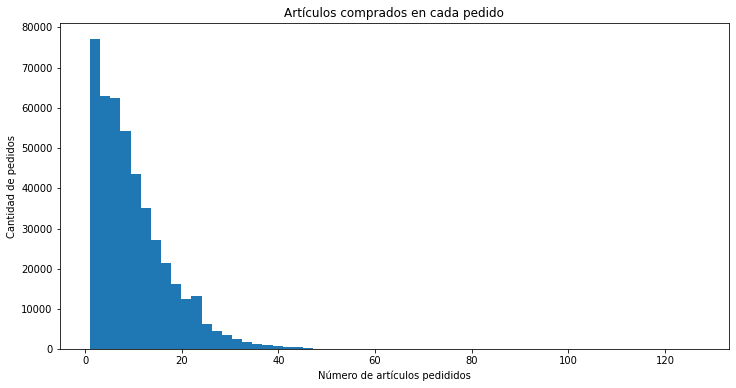

In [46]:
# Agrupar por 'order_id' y contar por la columna 'product_id' para saber la cantidad de productos que hay por cada pedido
porducts_in_a_order = order_products_df.groupby('order_id')['product_id'].count()

# Saca la frecuencia de las ordenes de acuerdo a la cantidad de productos
frecuency_of_prducts = porducts_in_a_order.value_counts()

# Graficar
porducts_in_a_order.plot(kind='hist', bins=60, figsize=(12,6), title='Artículos comprados en cada pedido')
plt.xlabel('Número de artículos pedididos')
plt.ylabel('Cantidad de pedidos')
plt.show()

En el histograma se observa que casi 80000 pedidos tienen de 1 a 2 artículos, y a partir de ahí comienza a descencer el número de artículos que hay en cada pedido. Sólo 60000 pedidos tienen más de 6 artículos. Y un poco más de 10 000 pedidos contienen 20 artículos.

Se puede ver que son muy pocos los pedidos que tienen 40 artículos. Y  no se puede ver cuantos pedidos tienen más de 60 artículos, lo que nos hace pensar que no más de 10 pedidos tengan más de 60 artículos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [50]:
# Del ejercicio B3 ya se tiene una tabla combinada llamada second_merge que se utilizará de nuevo

# Se filtra sólo para productos que han sido reordenados
products_names_20_reordered = second_merge[second_merge['reordered']==1]

# Hago uso de pivot_tables en esa tabla resultante (second_merge) para poder obtener un DataFrame con el product_id,
# product_name y que cuente cuantas veces aparece ese nombre en la tabla. 
products_names_20_reordered = pd.pivot_table(products_names_20_reordered, index=['product_id','product_name'], values='order_id', aggfunc='count')

# Ordena los valores en forma descendente y guarda solo los primeros 20
products_names_20_reordered = products_names_20_reordered.sort_values(by='order_id', ascending=False).head(20)

products_names_20_reordered.columns=['quantity']

display(products_names_20)

,,quantity
product_id,product_name,
24852,BANANA,66050
13176,BAG OF ORGANIC BANANAS,53297
21137,ORGANIC STRAWBERRIES,37039
21903,ORGANIC BABY SPINACH,33971
47209,ORGANIC HASS AVOCADO,29773
47766,ORGANIC AVOCADO,24689
47626,LARGE LEMON,21495
16797,STRAWBERRIES,20018
26209,LIMES,19690


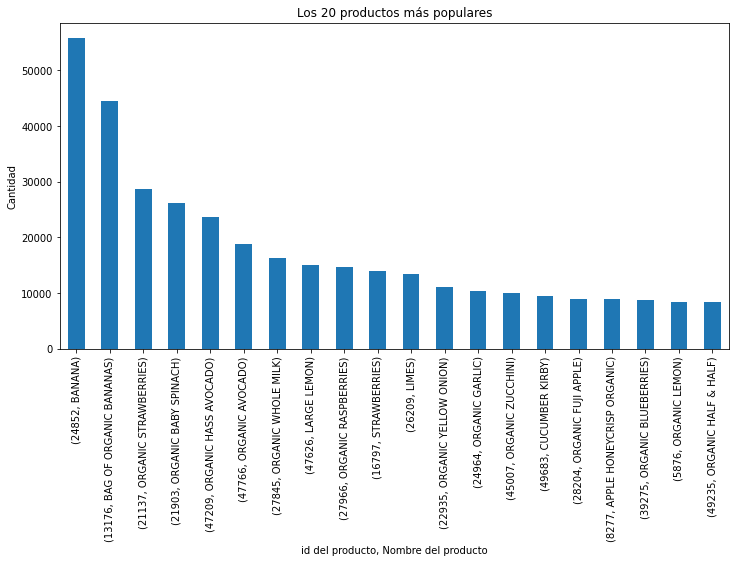

In [51]:
products_names_20_reordered.plot(kind='bar', figsize=(12,6), title='Los 20 productos más populares', xlabel='id del producto, Nombre del producto',
                      ylabel='Cantidad', legend=False)

plt.show() 

Los primeros 6 productos que se reordenan más, son de igual manera los 6 productos más populares (ejercicio B3). Es a partir del séptimo producto que la lista difiere un poco.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

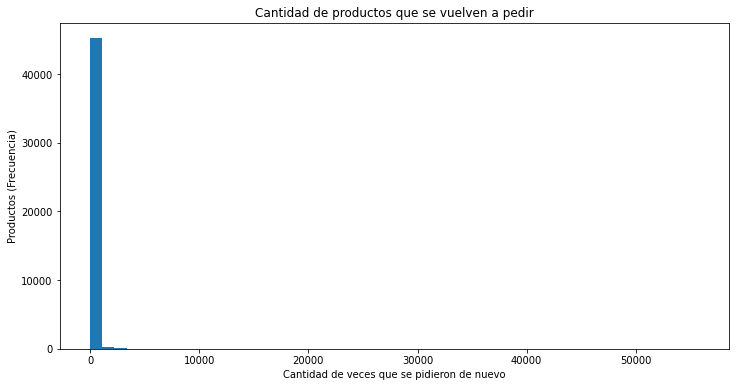

In [128]:
# Agrupe por 'product_id' y sume cuantas veces se ha reordenado
products_proportion = order_products_df.groupby('product_id')['reordered'].sum()

products_proportion = products_proportion.sort_values()

products_proportion.plot(kind='hist', bins=50, figsize=(12,6), title='Cantidad de productos que se vuelven a pedir')
plt.xlabel('Cantidad de veces que se pidieron de nuevo')
plt.ylabel('Productos (Frecuencia)')
plt.show()

La gran dmayoria de productos sólo se pidieron de nuevo muy pocas veces. Como se ve en el histograma, cuánto más se acerca a 0 la frecuencia aumenta hasta más de 40000. Esto significa que hubo más de 40000 productos tuvieron 0 reordenaciones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

* Para este ejercicio se va a utilizar la misma lógica que el anterior, sólo que ahora se agrupará por ```'user_id``` para saber la cantidad de productos ordenados por usuario

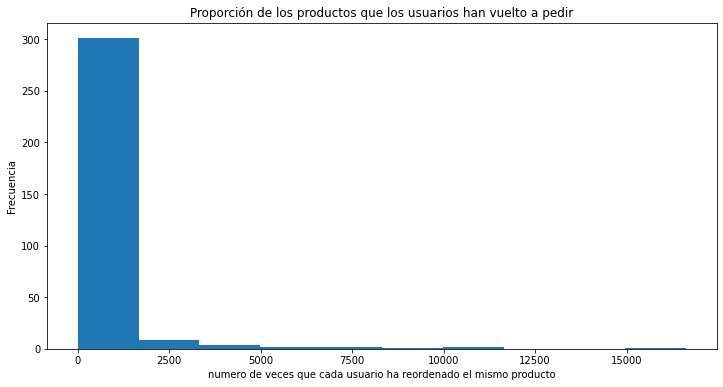

In [129]:
# Contar los productos pedidos por usuario
users_products_proportion = second_merge.groupby('user_id')['reordered'].sum()

users_products_proportion_frecuencies = users_products_proportion.value_counts()

# Graficar
users_products_proportion_frecuencies.plot(kind='hist', title='Proporción de los productos que los usuarios han vuelto a pedir',
                            figsize=(12,6))

plt.xlabel('Número de veces que cada usuario ha reordenado el mismo producto')
plt.ylabel('Frecuencia')
plt.show()


La gran dmayoria de productos sólo se pidieron de nuevo muy pocas veces. Como se ve en el histograma, cuánto más se acerca a 0 la frecuencia aumenta hasta más de 40000. Esto significa que hubo más de 40000 productos tuvieron 0 reordenaciones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

* Para este ejercicio usare la tabla ```second_merge```, la cual ya tiene combinados los datos y se ha usado anteriormente.

* Primero haré un filtro para esta tabla donde ```'add_to_cart_order = 1'```, así tendré puros renglones de productos que han sido seleccionados primero.

* Después haré un conteo de lo productos para saber cúal es el que se ha vendido más y a partir de ahí filtrar los 20 primeros

In [ ]:
# Filtro para add_to_cart_order
add_to_cart_order_equals_1 = second_merge[second_merge['add_to_cart_order']==1]

# Contar los productos
principals_20 = add_to_cart_order_equals_1.groupby('product_name')['product_name'].count()

# Ordenar de manera descendente
principals_20_sorted = principals_20.sort_values(ascending=False).head(20)

# Graficar
principals_20_sorted.plot(kind='bar', title='Principales productos que las personas ponene en su carrito primero',
                         xlabel='Nombre de producto', ylabel='Cantidad de productos', figsize=(12,6))

plt.show()

El producto que más es pedido y a la vez, el que mayormente ponen los usuarios primero en su carrito es ```'BANANA'```, y de igual manera el segundo puesto es para ```'BAG OF ORGANIC BANANAS'``` , como ya se había visto en la gráfica de los 20 artículos que la gente más compra.

### Conclusion general del proyecto:

Este fue un gran reto, fue un excelente proyecto. Me gustó que no fuera tan llevado de la mano como los anteriores, así cuando vea mis correcciones podré saber que desciciones fueron las que tomé mal.

Se llegó a los resultados pedidos por cada ejercicio usando diferentes técnicas enseñadas en el curso, traté de usar una variedad amplia de métodos para solucionar los ejercicios, con el fin de practicar lo más posible la mayor parte de temas vistos en el BootCamp.